In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn')

# [3월 10일]
---

## # 경사하강법
---
[비용 최소화]  

- 비용함수 R(w)는 변수가 w 파라미터로 이뤄진 함수이며 R(w)를 최소화하는 w0와 w1의 값은 R(w)를 w0, w1으로 순차적으로 편미분해 얻을 수 있다.  
 w1 편미분값 : $-2/N*sigmax*diff$, w0 편미분값 : $-2/N*sigma*diff$
- 업데이트는 새로운 w1을 이전 w1에서 편미분 결과값을 반영하는데 기울기가 양수이면 감소, 음수이면 증가
- 편미분값이 너무 클 수 있기 때문에 보정 계수를 곱하는데 이를 학습률이라고 한다.
 - learning rate(학습률) : https://blog.naver.com/heetae185/222646465288
- 참조 : https://www.youtube.com/watch?v=ve6gtpZV83E, https://angeloyeo.github.io/2020/08/16/gradient_descent.html

In [15]:
# 경사하강법 사용자 함수
def get_weight_updates(w1, w0, X, y, learning_rate = 0.01):
    N = len(y)
    w1_update = np.zeros_like(w1)
    w0_update = np.zeros_like(w0)
    y_pred = np.dot(X, w1.T) + w0 # 회귀식
    diff = y - y_pred
    w0_factors = np.ones((N, 1))
    w1_update = -(2/N) * learning_rate * (np.dot(X.T, diff))
    w0_update = -(2/N) * learning_rate * (np.dot(w0_factors.T, diff))
    return w1_update, w0_update

# 경사하강법 연속 반영
def gradient_descent_steps(X, y, iters = 10000):
    w0 = np.zeros((1, 1))
    w1 = np.zeros((1, 1))
    
    for ind in range(iters):
        w1_update, w0_update = get_weight_updates(w1, w0, X, y, learning_rate = 0.01)
        w1 = w1 - w1_update
        w0 = w1 - w0_update
    return w1, w0

# 손실 함수 (or 비용 함수)
def get_cost(y, y_pred):
    N = len(y)
    cost = np.sum(np.square(y - y_pred))/N
    return cost

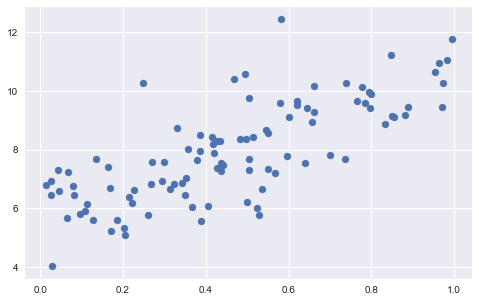

In [11]:
# 간단한 회귀 예측 데이터

np.random.seed(2)
X = np.random.rand(100, 1)
y = 6 + 4 * X + np.random.randn(100, 1)

plt.figure(figsize = (8, 5))
plt.scatter(X, y)
plt.show()

In [16]:
w1, w0 = gradient_descent_steps(X, y, iters = 1000)
print(f'w1 : {w1[0, 0]:.3f} w0 : {w0[0, 0]:.3f}')
y_pred = w1[0, 0] * X + w0
print(f'Gradient Descent Total Cost : {get_cost(y, y_pred)}')

w1 : 5.380 w0 : 5.382
Gradient Descent Total Cost : 1.2624883083815899
